# Assignment 04.12.17 - Patrick Werner

## Exercise 1
![Mindmap](mindmap.png)

## Exercise 2

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prettier plots
sns.set()

# Save plots as vector graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
#set_matplotlib_formats('pdf', 'png') # too much for scatter
sns.set(rc={"savefig.dpi" : 75,
            "figure.figsize" : [4, 4]})

# Use latex for plot texts
#sns.set(font_scale=1.5, rc={"text.usetex" : True,
#            "font.family" : "serif",
#            "font.serif" : "cm"})

$W_{i(x)} = arg~min_k || x - W_k ||~~~k=1,2,...,l$

should be the same as

$W_{i(x)} = arg~max_k<W_k, x>~~k=1,2,...,l$

In [2]:
# https://stackoverflow.com/questions/21030391/how-to-normalize-an-array-in-numpy
def normalized(a, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

In [3]:
same = []
for i in range(1000):
    # Normalized input
    x = np.random.random(10)
    x = normalized(x)[0]
    
    # Normalized weights
    weights = np.random.random((800,10))
    weights = normalized(weights)
    
    # Apply both methods
    innerProducts = []
    distance = []
    for k in range(weights.shape[0]):
        innerProducts.append(np.dot(weights[k], x))
        distance.append(np.linalg.norm(x-weights[k]))
        
    # Compare result
    same.append(np.argmax(innerProducts) == np.argmin(distance))

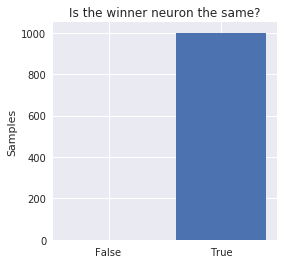

In [4]:
# Plot results
plt.bar([0,1], [len(same)-sum(same), sum(same)])
plt.xticks([0,1], ["False", "True"])
plt.title("Is the winner neuron the same?")
plt.ylabel("Samples")
plt.show()

## Exercise 3

In [5]:
class SOM(object):
    def __init__(self, nNeurons, nInputs, initNeurons=None):
        # Initialize with random small values
        if initNeurons is None:
            self.neurons = np.random.random((nNeurons, nInputs))
        else:
            self.neurons = initNeurons

    def winningNeuron(self, x):
        distances = []
        for j in range(self.neurons.shape[0]):
            distances.append(np.linalg.norm(x - self.neurons[j]))
        return np.argmin(distances)
    
    def train(self, inputs, learningRate):
        # Draw a sample from input
        for i in np.random.permutation(inputs.shape[0]):
            x = inputs[i]
            
            # Find the best matching neuron
            wNInd = self.winningNeuron(x)
            
            # Store old weights
            oldNeurons = np.copy(self.neurons)
            
            # Adjust synaptic weights 
            self.update(x, wNInd, learningRate)
            
            # Stopping criterion
            if (self.stop(oldNeurons)):
                break
            
    def update(self, x, winningNeuronInd, learningRate):
        for j in range(self.neurons.shape[0]):
            self.neurons[j] += learningRate
                               * self.neighborhoodFunction(winningNeuronInd, j)
                               * (x - self.neurons[j])
    
    def neighborhoodFunction(self, winningNeuronInd, j):
        return int(winningNeuronInd == j)
    
    def stop(self, oldNeurons):
        return np.linalg.norm(oldNeurons - self.neurons)**2 < 0.01
    
    def clustering(self, inputs):
        c = []
        for i in range(inputs.shape[0]):
            c.append([s.winningNeuron(inputs[i])])
        return np.array(c)

In [6]:
# General stuff
inputs = np.array([[0.1],
                   [0.2],
                   [0.4],
                   [0.5]])

nNodes = 2
learningRate = 0.1

In [7]:
# Lower weights
w1 = 0.15
w2 = 0.45
initNeurons0 = np.array([[w1], [w2]])

s = SOM(nNodes, inputs.shape[1], initNeurons0)
s.train(inputs, learningRate)
print(s.clustering(inputs))

[[0]
 [0]
 [1]
 [1]]


In [8]:
# Higher weights
w1 = 0.3
w2 = 0.9
initNeurons1 = np.array([[w1], [w2]])

s = SOM(nNodes, inputs.shape[1], initNeurons1)
s.train(inputs, learningRate)
print(s.clustering(inputs))

[[0]
 [0]
 [0]
 [0]]


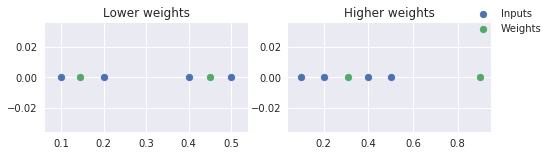

In [9]:
fig, arr = plt.subplots(1, 2, figsize=(8,2))

arr[0].scatter(inputs, np.zeros(len(inputs)))
arr[0].scatter(initNeurons0, np.zeros(len(initNeurons0)))
arr[0].set_title("Lower weights")

arr[1].scatter(inputs, np.zeros(len(inputs)), label="Inputs")
arr[1].scatter(initNeurons1, np.zeros(len(initNeurons1)), label="Weights")
arr[1].set_title("Higher weights")
fig.legend()
plt.show()

As can be seen in the previous figure the starting weights in the first case are exactly in between the two clusters. However, in the second case only the first weight is near any inputs.

Because of the neighborhood function only the nearest of the weights is being updated, thus leading to the clusterings obtained.

## Exercise 4

In [10]:
# Generate starting positions
def circlePoints(nPoints, origin, radius):
    t = np.linspace(np.pi, -np.pi, nPoints+1)
    t = t[0:-1] # Remove duplicate
    x = np.cos(t) * radius + origin[0]
    y = np.sin(t) * radius + origin[1]
    x = np.expand_dims(x, 1)
    y = np.expand_dims(y, 1)
    return np.append(x,y,1)

In [11]:
# Cities
stralsund = [13.07703, 54.30907]
greifswald = [13.39234, 54.08655]
neubrandenburg = [13.27793, 53.56783]
schwerin = [11.40125, 53.63550]
wismar = [11.45160, 53.89794]
rostock = [12.09915, 54.09244]
cities = np.array(["Stralsund", "Greifswald", "Neubrandenburg", "Schwerin", "Wismar", "Rostock"])

inputs = np.array([stralsund, greifswald, neubrandenburg, schwerin, wismar, rostock])
# Normalize inputs
inputs[:,0] = (inputs[:,0]-np.min(inputs[:,0]))/(np.max(inputs[:,0])-np.min(inputs[:,0]))
inputs[:,1] = (inputs[:,1]-np.min(inputs[:,1]))/(np.max(inputs[:,1])-np.min(inputs[:,1]))

In [12]:
# Parameters
nTrainingSteps = 200
learningRate = 0.1
nExtraNodes = 3
origin = [0.5, 0.5]
radius = 0.3
initWeights = circlePoints(inputs.shape[0]+nExtraNodes, origin, radius)

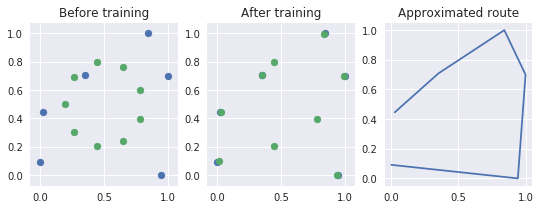

Shortest route: ['Wismar' 'Rostock' 'Stralsund' 'Greifswald' 'Neubrandenburg' 'Schwerin']


In [13]:
s = SOM(inputs.shape[0]+nExtraNodes, inputs.shape[1], initWeights)

# Plot the positions before and after training
fig, arr = plt.subplots(1, 3, figsize=(9,3))
arr[0].scatter(inputs[:,0], inputs[:,1])
arr[0].scatter(s.neurons[:,0], s.neurons[:,1])
arr[0].set_title("Before training")
for i in range(nTrainingSteps):
    s.train(inputs, learningRate)
arr[1].scatter(inputs[:,0], inputs[:,1])
arr[1].scatter(s.neurons[:,0], s.neurons[:,1])
arr[1].set_title("After training")

# Get the route
pairs = np.append(s.clustering(inputs), np.mgrid[0:inputs.shape[0], :1][0], 1)
route = pairs[pairs[:,0].argsort()][:,1]

# Plot the route
arr[2].plot(inputs[route][:,0], inputs[route][:,1])
arr[2].set_title("Approximated route")
plt.show()
print("Shortest route:", cities[route])

### Testing with data taken from [TSPLIB](http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/index.html)
#### Bavaria dataset with 29 cities 

In [14]:
# Import dataset
datasetName = "bayg29"
inputs = np.loadtxt(datasetName + ".tsp")[:,1:3]
optimalRoute = np.loadtxt(datasetName + ".opt.tour", dtype=int)-1

# Normalize inputs
inputs[:,0] = (inputs[:,0]-np.min(inputs[:,0]))/(np.max(inputs[:,0])-np.min(inputs[:,0]))
inputs[:,1] = (inputs[:,1]-np.min(inputs[:,1]))/(np.max(inputs[:,1])-np.min(inputs[:,1]))

In [15]:
# Parameters
nTrainingSteps = 5000
learningRate = 0.1
nExtraNodes = 0
origin = [0.5, 0.5]
radius = 0.3
initWeights = circlePoints(inputs.shape[0]+nExtraNodes, origin, radius)

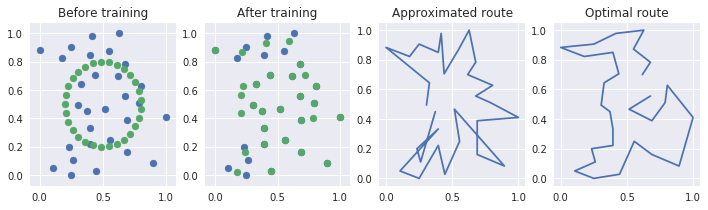

In [16]:
s = SOM(inputs.shape[0]+nExtraNodes, inputs.shape[1], initWeights)

# Plot the positions before and after training
fig, arr = plt.subplots(1, 4, figsize=(12,3))
arr[0].scatter(inputs[:,0], inputs[:,1], label="")
arr[0].scatter(s.neurons[:,0], s.neurons[:,1])
arr[0].set_title("Before training")
for i in range(nTrainingSteps):
    s.train(inputs, learningRate)
arr[1].scatter(inputs[:,0], inputs[:,1])
arr[1].scatter(s.neurons[:,0], s.neurons[:,1])
arr[1].set_title("After training")

# Get the route
pairs = np.append(s.clustering(inputs), np.mgrid[0:inputs.shape[0], :1][0], 1)
route = pairs[pairs[:,0].argsort()][:,1]

# Plot the routes
arr[2].plot(inputs[route][:,0], inputs[route][:,1])
arr[2].set_title("Approximated route")
arr[3].plot(inputs[optimalRoute][:,0], inputs[optimalRoute][:,1])
arr[3].set_title("Optimal route")
plt.show()

#### US capitals with 48 cities 

In [17]:
# Import dataset
datasetName = "att48"
inputs = np.loadtxt(datasetName + ".tsp")[:,1:3]
optimalRoute = np.loadtxt(datasetName + ".opt.tour", dtype=int)-1

# Normalize inputs
inputs[:,0] = (inputs[:,0]-np.min(inputs[:,0]))/(np.max(inputs[:,0])-np.min(inputs[:,0]))
inputs[:,1] = (inputs[:,1]-np.min(inputs[:,1]))/(np.max(inputs[:,1])-np.min(inputs[:,1]))

In [18]:
# Parameters
nTrainingSteps = 5000
learningRate = 0.1
nExtraNodes = 0
origin = [0.5, 0.5]
radius = 0.3
initWeights = circlePoints(inputs.shape[0]+nExtraNodes, origin, radius)

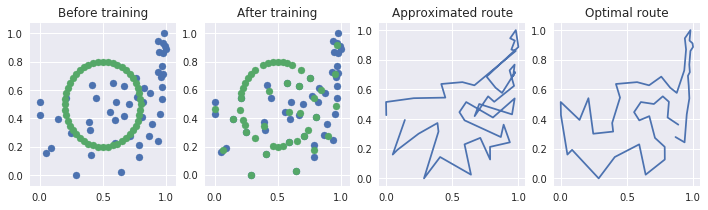

In [19]:
s = SOM(inputs.shape[0]+nExtraNodes, inputs.shape[1], initWeights)

# Plot the positions before and after training
fig, arr = plt.subplots(1, 4, figsize=(12,3))
arr[0].scatter(inputs[:,0], inputs[:,1], label="")
arr[0].scatter(s.neurons[:,0], s.neurons[:,1])
arr[0].set_title("Before training")
for i in range(nTrainingSteps):
    s.train(inputs, learningRate)
arr[1].scatter(inputs[:,0], inputs[:,1])
arr[1].scatter(s.neurons[:,0], s.neurons[:,1])
arr[1].set_title("After training")

# Get the route
pairs = np.append(s.clustering(inputs), np.mgrid[0:inputs.shape[0], :1][0], 1)
route = pairs[pairs[:,0].argsort()][:,1]

# Plot the routes
arr[2].plot(inputs[route][:,0], inputs[route][:,1])
arr[2].set_title("Approximated route")
arr[3].plot(inputs[optimalRoute][:,0], inputs[optimalRoute][:,1])
arr[3].set_title("Optimal route")
plt.show()

#### Drilling problem with 280 points

In [20]:
# Import dataset
datasetName = "a280"
inputs = np.loadtxt(datasetName + ".tsp")[:,1:3]
optimalRoute = np.loadtxt(datasetName + ".opt.tour", dtype=int)-1

# Normalize inputs
inputs[:,0] = (inputs[:,0]-np.min(inputs[:,0]))/(np.max(inputs[:,0])-np.min(inputs[:,0]))
inputs[:,1] = (inputs[:,1]-np.min(inputs[:,1]))/(np.max(inputs[:,1])-np.min(inputs[:,1]))

In [21]:
# Parameters
nTrainingSteps = 5000
learningRate = 0.1
nExtraNodes = 0
origin = [0.5, 0.5]
radius = 0.3
initWeights = circlePoints(inputs.shape[0]+nExtraNodes, origin, radius)

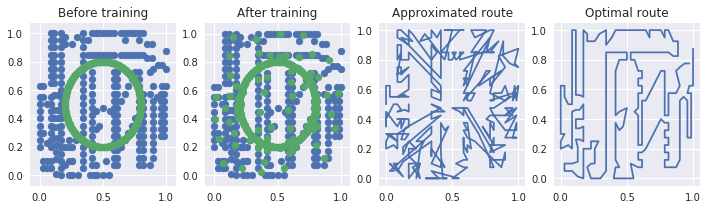

In [22]:
s = SOM(inputs.shape[0]+nExtraNodes, inputs.shape[1], initWeights)

# Plot the positions before and after training
fig, arr = plt.subplots(1, 4, figsize=(12,3))
arr[0].scatter(inputs[:,0], inputs[:,1], label="")
arr[0].scatter(s.neurons[:,0], s.neurons[:,1])
arr[0].set_title("Before training")
for i in range(nTrainingSteps):
    s.train(inputs, learningRate)
arr[1].scatter(inputs[:,0], inputs[:,1])
arr[1].scatter(s.neurons[:,0], s.neurons[:,1])
arr[1].set_title("After training")

# Get the route
pairs = np.append(s.clustering(inputs), np.mgrid[0:inputs.shape[0], :1][0], 1)
route = pairs[pairs[:,0].argsort()][:,1]

# Plot the routes
arr[2].plot(inputs[route][:,0], inputs[route][:,1])
arr[2].set_title("Approximated route")
arr[3].plot(inputs[optimalRoute][:,0], inputs[optimalRoute][:,1])
arr[3].set_title("Optimal route")
plt.show()

## Exercise 5

Questions are provided in a separate textfile.